# K-Means Clustering
by Vinodhini Rajamanickam

K-means clustering is a way to group similar data points together. 
It works by finding the center of each group and then assigning each data point to the nearest center. 
The center of each group is called a centroid. 
K-means clustering is used in many different fields to help people understand large amounts of data.

## import necessary modules

In [2]:
#for data manipulation and analysis
import pandas as pd

#for loading datasets and visualization
import seaborn as sns
import matplotlib.pyplot as plt

#for encoding categorical data
from sklearn.preprocessing import LabelEncoder

#for clustering
from sklearn.cluster import KMeans


from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

## iris dataset

#### read datset

In [3]:
iris = sns.load_dataset("iris")

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### drop uwanted columns

In [5]:
iris = iris.drop(['species'],axis = 1)

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### clustering

In [7]:
#creating object for k means
kmeans = KMeans(n_clusters =3)

#fitting the dataset
kmeans.fit(iris)

#predicting the clusters
groups = kmeans.predict(iris)

#print dataset
print(groups)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [9]:
iris["groups"] = groups
iris

,sepal_length,sepal_width,petal_length,petal_width,groups
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### plotting the clusters

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

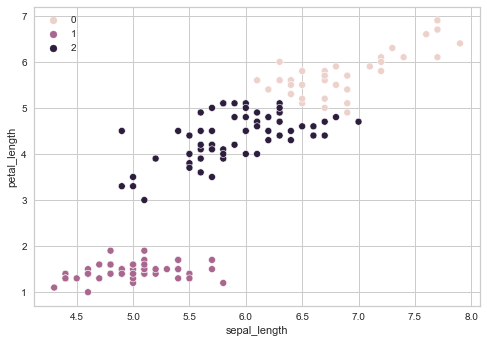

In [6]:
sns.scatterplot(data = iris, x ="sepal_length", y = "petal_length",hue = groups)

<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

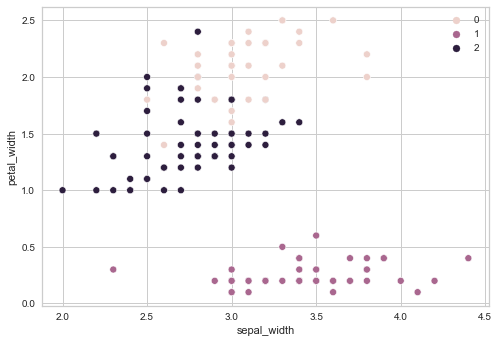

In [15]:
sns.scatterplot(data = iris, x ="sepal_width", y = "petal_width",hue = groups)

#### k elbow visualizer

The K-Elbow Visualizer is a tool used in machine learning to help data scientists select 
the optimal number of clusters by fitting the model with a range of values for K. 
If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good 
indication that the underlying model fits best at that point.

The K-Elbow Visualizer implements the “elbow” method of selecting the optimal number of clusters 
for K-means clustering. K-means is a simple unsupervised machine learning algorithm that groups 
data into a specified number (k) of clusters.

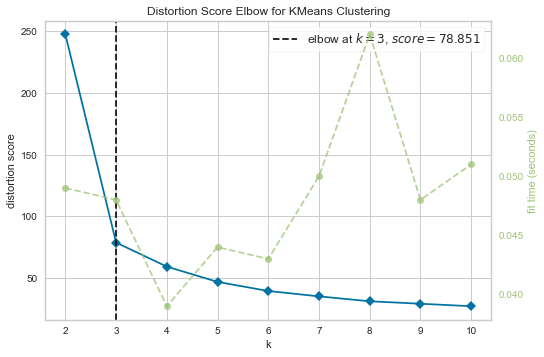

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
#creating object for KElbowVisualizer()
kev = KElbowVisualizer(kmeans)

#fitting the dataset
kev.fit(iris)

#plotting the graph
kev.show()

#### silhouette Visualizer

The Silhouette Visualizer is a tool used in machine learning to display the silhouette coefficient 
for each sample on a per-cluster basis, visually evaluating the density and separation between clusters. 
The score is calculated by averaging the silhouette coefficient for each sample, computed as the difference 
between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by 
the maximum value.
This produces a score between -1 and +1

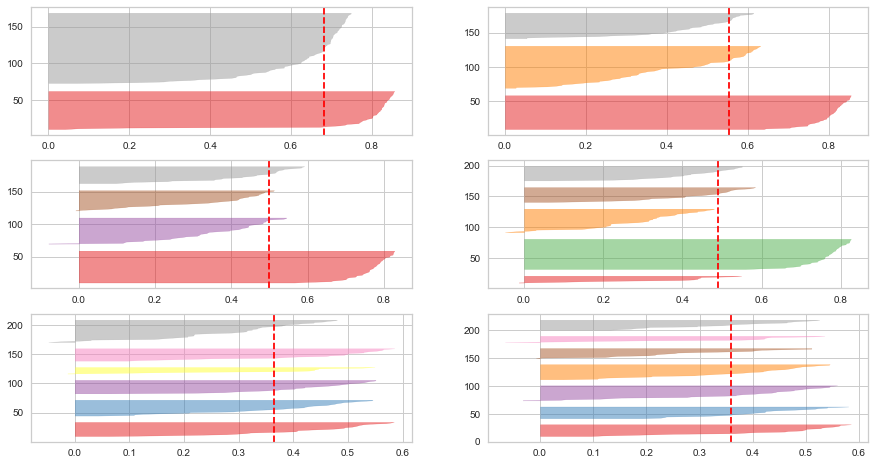

In [9]:
#subplots of different cluster values
fig, ax = plt.subplots(3,2,figsize = (15,8))
for i in [2,3,4,5,6,7]:
    km = KMeans(n_clusters = i)
    q, mod = divmod(i,2)
    sv = SilhouetteVisualizer(km, ax = ax[q-1][mod])
    sv.fit(iris)
    
#plotting the graph
plt.show()

## titanic dataset

#### read dataset

In [11]:
data = sns.load_dataset("titanic")

In [12]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### drop unwanted columns

In [13]:
data = data.drop(["alive","survived"],axis = 1)

In [14]:
data.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True


#### fill null values

In [15]:
data.isnull().sum()

pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

In [16]:
data = data.fillna(method = "pad")

In [17]:
data.isnull().sum()

pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           1
embark_town    0
alone          0
dtype: int64

#### encoding the categorical columns

In [18]:
categorical_columns = ["sex","embarked","adult_male","alone","pclass", "age","sibsp","parch","fare","class","who","embark_town","deck"]
le = LabelEncoder()
for col in categorical_columns :
    le.fit(data[col])
    data[col] = le.transform(data[col])

data

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,2,1,28,1,0,18,2,2,1,1,7,2,0
1,0,0,51,1,0,207,0,0,2,0,2,0,0
2,2,0,34,0,0,41,2,2,2,0,2,2,1
3,0,0,47,1,0,189,2,0,2,0,2,2,0
4,2,1,47,0,0,43,2,2,1,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,1,35,0,0,85,2,1,1,1,2,2,1
887,0,0,24,0,0,153,2,0,2,0,1,2,1
888,2,0,24,1,2,131,2,2,2,0,1,2,0
889,0,1,34,0,0,153,0,0,1,1,2,0,1


#### training model

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
groups = kmeans.predict(data)
print(groups)


[1 2 1 2 1 1 2 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 2 0 0 1 2 1 1 0 2 1 1 2 2 1
 1 0 1 1 0 1 2 1 1 0 1 0 0 2 1 2 0 2 2 1 1 0 2 1 2 2 0 0 0 1 1 1 1 1 2 2 0
 2 1 1 1 0 0 1 1 1 2 1 0 0 1 2 1 1 1 2 0 1 1 2 2 0 0 1 1 2 1 1 1 1 1 1 0 2
 0 1 1 0 1 1 0 2 0 2 1 0 0 2 1 1 1 0 1 1 1 0 0 0 0 0 2 1 2 0 1 0 1 1 2 1 0
 0 0 0 2 1 0 1 2 1 1 1 2 0 0 1 1 2 0 2 0 0 2 2 0 1 1 0 1 0 0 0 1 2 0 0 2 0
 2 0 0 0 1 0 0 1 0 0 2 1 1 1 0 1 2 1 1 1 1 0 0 1 0 1 0 1 0 1 2 1 0 2 1 1 0
 1 1 2 1 1 1 0 0 2 1 0 0 1 1 0 0 1 1 0 0 1 1 1 2 1 0 2 0 1 1 0 0 0 0 2 2 2
 0 1 0 2 1 1 1 2 1 2 2 0 1 0 0 1 2 1 1 0 0 1 1 1 1 0 1 1 1 0 1 2 2 0 1 1 0
 1 2 0 2 1 0 1 0 1 2 2 2 0 2 2 2 0 1 0 1 0 0 2 2 1 1 0 0 2 2 1 0 0 2 0 0 2
 0 2 1 2 2 1 2 0 2 0 0 0 0 0 0 0 1 1 2 1 0 1 1 2 0 1 1 0 0 0 1 0 1 2 1 1 2
 2 1 1 2 0 2 1 2 1 1 2 0 1 2 1 2 2 0 1 1 2 1 1 2 0 1 1 0 1 0 1 1 1 0 1 0 1
 0 1 0 1 1 2 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 2 2 2 0 2 1 0 1 1 0
 1 2 0 0 0 0 0 0 0 2 1 1 0 2 1 1 0 1 2 0 1 1 1 0 1 0 1 1 0 0 1 2 0 1 1 1 2
 1 1 1 2 0 2 0 1 0 0 1 0 

In [20]:
data["groups"] = groups
data.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone,groups
0,2,1,28,1,0,18,2,2,1,1,7,2,0,1
1,0,0,51,1,0,207,0,0,2,0,2,0,0,2
2,2,0,34,0,0,41,2,2,2,0,2,2,1,1
3,0,0,47,1,0,189,2,0,2,0,2,2,0,2
4,2,1,47,0,0,43,2,2,1,1,2,2,1,1


#### K Elbow Visualizer

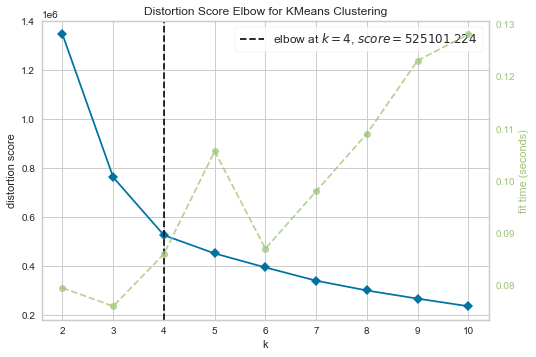

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
kev = KElbowVisualizer(kmeans)

kev.fit(data)
kev.show()

#### Silhouette Visualizer

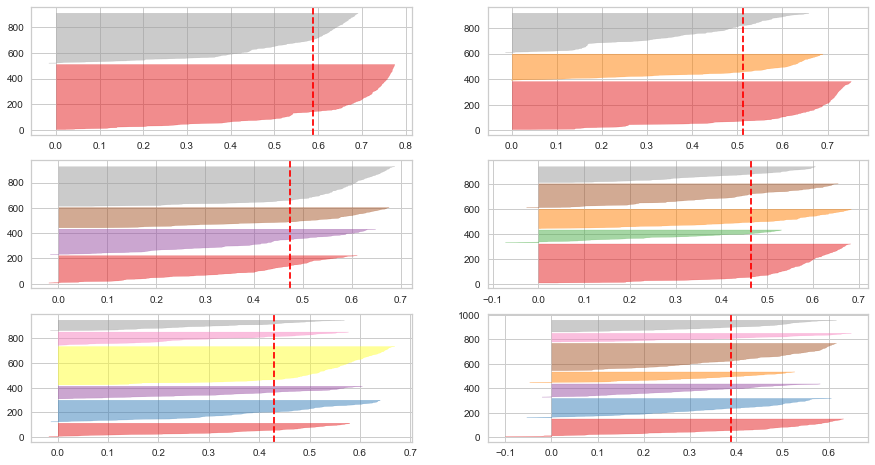

In [24]:
#subplots of different cluster values
fig, ax = plt.subplots(3,2,figsize = (15,8))

for i in [2,3,4,5,6,7]:
    km = KMeans(n_clusters = i)
    q, mod = divmod(i,2)
    sv = SilhouetteVisualizer(km, ax = ax[q-1][mod])
    sv.fit(data)

#plotting graphs
plt.show()